In [274]:
import torch
import math
import matplotlib.pyplot as plt
import numpy

In [275]:
from sinusoidal_gradient_descent.core import complex_oscillator

N = 1024
n = torch.arange(N)

#torch.random.manual_seed(1000)
starting_freq = torch.rand(1) * math.pi
predicted_z = torch.exp(1j * starting_freq)
predicted_z.detach_().requires_grad_(True)
print(f"Starting frequency: {predicted_z.angle().abs().item():.3f}")

sig = 0

target_freq = torch.tensor(0.25) * math.pi
target_signal = torch.cos(target_freq * n) + sig**2 * torch.randn(n.shape)



criterion = torch.nn.MSELoss()
optimiser = torch.optim.SGD([predicted_z], lr=3e-4)
z_hist = torch.complex(torch.zeros(5000,1),torch.zeros(5000,1))
for step in range(5000):
    z_hist[step] = predicted_z
    predicted_signal = complex_oscillator(predicted_z, N=N, reduce=True)
    loss = criterion(predicted_signal, target_signal)
    optimiser.zero_grad()
    loss.backward()
    predicted_z.grad = predicted_z.grad / predicted_z.grad.abs()
    optimiser.step()

    if (step + 1) % 1000 == 0:
        print(f"--- Step: {step + 1} ---")
        print(f"Predicted frequency: {predicted_z.angle().abs().item():.3f}")
        print(f"Target frequency: {target_freq.item():.3f}")


Starting frequency: 3.034
--- Step: 1000 ---
Predicted frequency: 2.909
Target frequency: 0.785
--- Step: 2000 ---
Predicted frequency: 2.709
Target frequency: 0.785
--- Step: 3000 ---
Predicted frequency: 2.150
Target frequency: 0.785
--- Step: 4000 ---
Predicted frequency: 0.740
Target frequency: 0.785
--- Step: 5000 ---
Predicted frequency: 0.758
Target frequency: 0.785


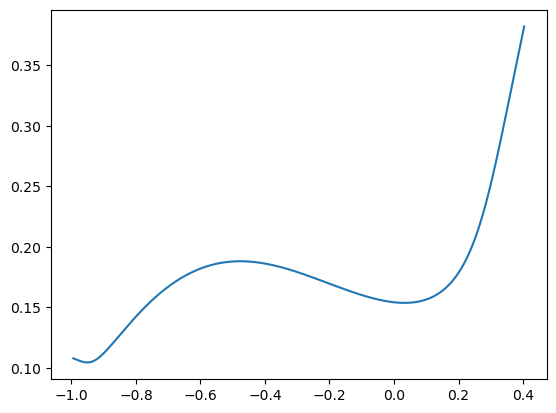

tensor([-0.9942+0.1079j])
tensor([0.4036+0.3823j], requires_grad=True)


In [276]:
plt.plot(torch.real(z_hist).detach().numpy(),torch.imag(z_hist).detach().numpy())
plt.show()

print(torch.exp(1j * starting_freq))
print(predicted_z)

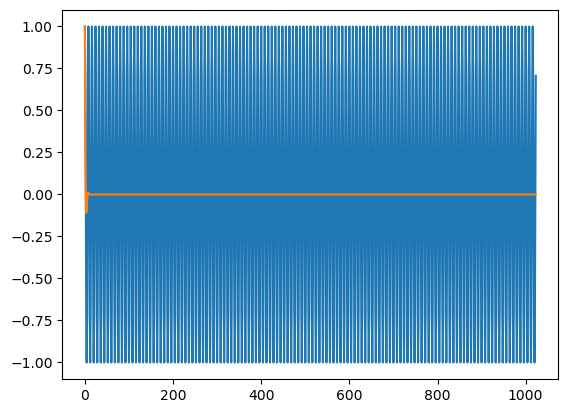

In [277]:
plt.plot(target_signal)
plt.plot(predicted_signal.detach().numpy())
plt.show()

## Random sampling and sparse recovery

### Random sampling

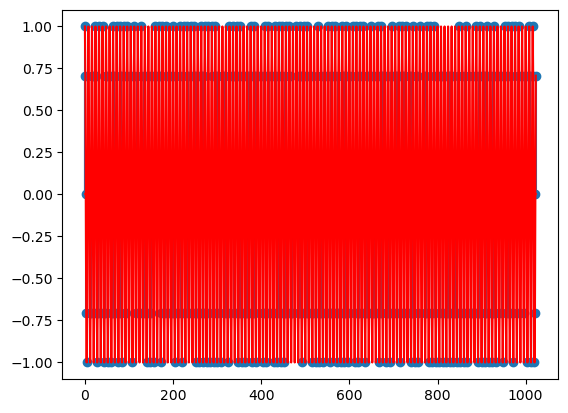

In [278]:
M = 1024

idx,_ = torch.sort(torch.randint(N,(M,1)))


sampling_vector = torch.zeros((N,1))
sampling_vector[idx] = 1

sampling_matrix = torch.diag(sampling_vector.squeeze())

randomly_sampled_signal = sampling_matrix @ target_signal.unsqueeze(1)

plt.stem(randomly_sampled_signal)
plt.plot(target_signal,'r')
plt.show()

### Loss function analysis

torch.Size([1000])


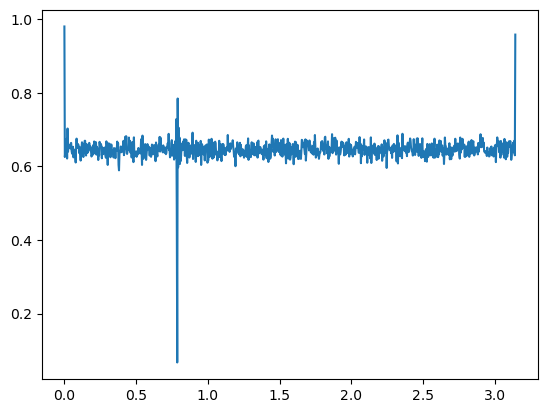

In [279]:
frange = torch.linspace(0,1,1000) * math.pi

print(frange.shape)
loss_hist = []
for i in range(frange.shape[0]):
    predicted_z = torch.exp(1j * frange[i])

    predicted_signal = complex_oscillator(predicted_z, N=N)

    sampled_predicted_signal = sampling_matrix @ predicted_signal.unsqueeze(1)

    loss_hist.append(criterion(sampled_predicted_signal, randomly_sampled_signal))

plt.plot(frange,loss_hist)
plt.show()

### Sparse recovery

In [280]:
#torch.random.manual_seed(1000)
starting_freq = torch.rand(1) * math.pi
predicted_z = torch.exp(1j * starting_freq)
predicted_z.detach_().requires_grad_(True)
print(f"Starting frequency: {predicted_z.angle().abs().item():.3f}")


criterion = torch.nn.MSELoss()
optimiser = torch.optim.SGD([predicted_z], lr=1e-4)
z_hist = torch.complex(torch.zeros(10000,1),torch.zeros(10000,1))
for step in range(10000):
    z_hist[step] = predicted_z
    predicted_signal = complex_oscillator(predicted_z, N=N, reduce=True)
    sampled_predicted_signal = sampling_matrix @ predicted_signal.unsqueeze(1)

    loss = criterion(sampled_predicted_signal, randomly_sampled_signal)
    optimiser.zero_grad()
    loss.backward()
    predicted_z.grad = predicted_z.grad / predicted_z.grad.abs()
    optimiser.step()

    if (step + 1) % 1000 == 0:
        print(f"--- Step: {step + 1} ---")
        print(f"Predicted frequency: {predicted_z.angle().abs().item():.3f}")
        print(f"Target frequency: {target_freq.item():.3f}")

Starting frequency: 2.972
--- Step: 1000 ---
Predicted frequency: 2.960
Target frequency: 0.785
--- Step: 2000 ---
Predicted frequency: 2.960
Target frequency: 0.785
--- Step: 3000 ---
Predicted frequency: 2.960
Target frequency: 0.785
--- Step: 4000 ---
Predicted frequency: 2.960
Target frequency: 0.785
--- Step: 5000 ---
Predicted frequency: 2.960
Target frequency: 0.785
--- Step: 6000 ---
Predicted frequency: 2.960
Target frequency: 0.785
--- Step: 7000 ---
Predicted frequency: 2.960
Target frequency: 0.785
--- Step: 8000 ---
Predicted frequency: 2.960
Target frequency: 0.785
--- Step: 9000 ---
Predicted frequency: 2.960
Target frequency: 0.785
--- Step: 10000 ---
Predicted frequency: 2.960
Target frequency: 0.785


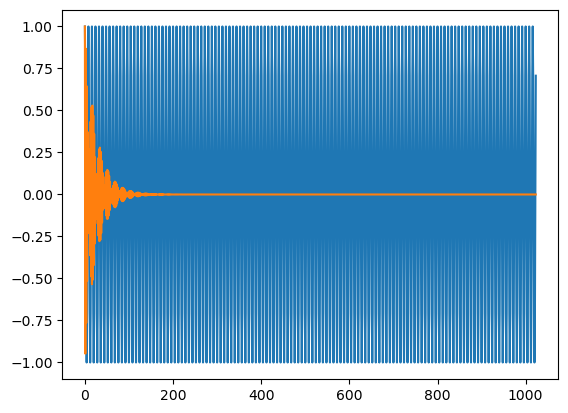

In [281]:
plt.plot(target_signal)
plt.plot(predicted_signal.detach().numpy())
plt.show()